# Matplotlib

# Learning Outcomes

The training below is adopted from the [Online Reference](http://matplotlib.org/)

At the end of the workshop, students would have gained an appreciate and hand-ons practical experience on the following topics:
* Line chart
* Controlling line properties
  * color 
  * line style
  * markers
* Working with multiple figures and axes
  * Subplots
  * Annotate
  * Fancy arrow patch
* Bar chart
* Histogram
* Scatter plot

matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. To get started, you can refer to the [tutorial](http://matplotlib.org/users/pyplot_tutorial.html#pyplot-tutorial).

In [1]:
import matplotlib

In [2]:
matplotlib.__version__

'3.0.3'

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
# Embed the charts within the notebook
%matplotlib inline              

*****

# Line Chart

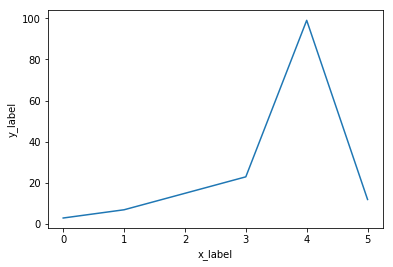

In [4]:
# Line chart
plt.plot([3,7,15,23,99,12])
plt.xlabel('x_label')
plt.ylabel('y_label')
plt.show()

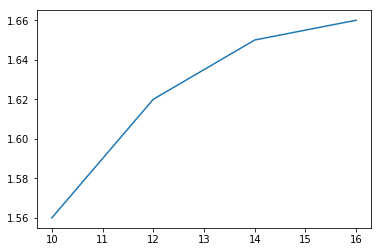

In [5]:
plt.plot([10, 12, 14, 16], [1.56, 1.62, 1.65, 1.66]);

*****

# Controlling line properties



For more you can search the [documentation](http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D). There are guides on setting [colour](http://matplotlib.org/api/colors_api.html#matplotlib.colors.ColorConverter.colors), [line styles](http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle), [markers](http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_marker) and much more.

/Users/anthonyn/anaconda3/envs/ml_with_python/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


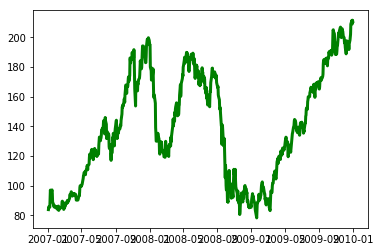

In [6]:
df = pd.read_csv('data/AAPL.csv', index_col='Date', parse_dates=True)
lines = plt.plot(df['Close'])  
plt.setp(lines, 'color', 'g', 'linewidth', 3.0);

*****

# Working with multiple figures and axes


* [Figure](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure)
* [axes](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.gca) 
* [subplot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)
* [adding text](http://matplotlib.org/users/text_props.html#text-properties) 
* [annotate](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate). 
* [Fancy Arrow Patch](http://matplotlib.org/api/patches_api.html#matplotlib.patches.FancyArrowPatch) for arrowprops.

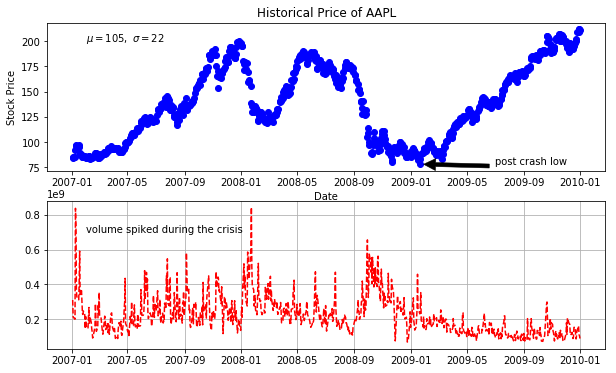

In [7]:
plt.figure(1, figsize=[10,6])         # We set the figure size to 10x6
plt.subplot(211)                      # nrows = 2, ncols = 1, plot_number = 1
plt.xlabel('Date')                    # x axis label
plt.ylabel('Stock Price')             # y axis label
plt.title('Historical Price of AAPL') # Title
plt.text('2007-2-1', 200, r'$\mu=105,\ \sigma=22$')  # No relevance to the chart. Just look fancy
plt.annotate('post crash low',
             xy=('2009-01-20', 78.20), 
             xytext=('2009-07-01', 78.20),
             arrowprops=dict(facecolor='black', 
                             linewidth = 0.5, 
                             shrink=0.05),)  
# Annotate. xy : data point, xytext = coordinate to put text
plt.plot(df['Close'], 'bo')            # "b", sets color to blue, "o", sets marker to circle 

plt.subplot(212)                       # nrows = 2, ncols = 1, plot_number = 2
plt.plot(df['Volume'], 'r--')          # "r", sets color to red, "--", sets line style to dashed 
plt.text('2007-2-1', 7e8, 'volume spiked during the crisis')
plt.grid(True)
plt.show()

*****

# Bar Chart


[Online Reference](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar)

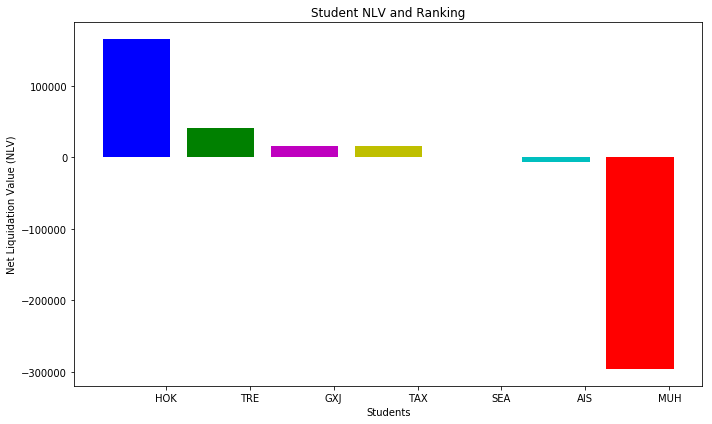

In [8]:
x = ['HOK', 'TRE', 'GXJ', 'TAX', 'SEA', 'AIS', 'MUH']                           
# Students
y = [165780.31, 41705.70, 16322.10, 15730.83, 182.40, -6837.78, -296257.26]     
# NLV
index = np.arange(len(y))                                                       
bar_width = 0.35                                                                
plt.figure(1, figsize=[10,6])
plt.bar(index, y, color = ['b','g','m','y','k','c','r'])                        
# plot bar chart. Set the colour for each bar
plt.xticks(index + bar_width, x)                                                
# label x-axis of each bar 
plt.xlabel('Students')
plt.ylabel('Net Liquidation Value (NLV)')
plt.title('Student NLV and Ranking')
plt.tight_layout()

*****

### Histogram
[Online Reference](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist)

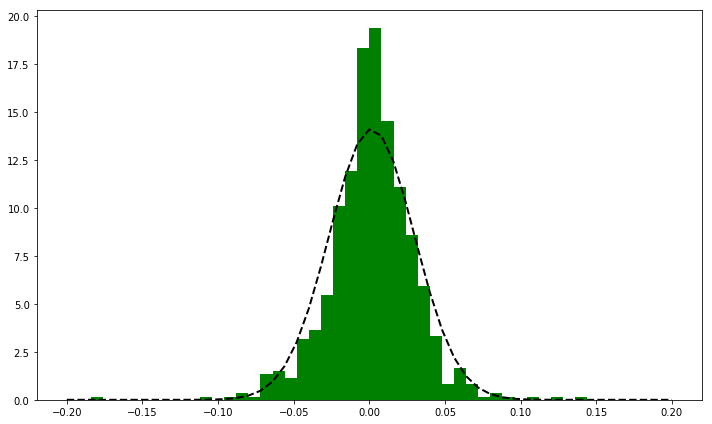

In [19]:
# import matplotlib.mlab as mlab
import scipy.stats

df = pd.read_csv('data/AAPL.csv', index_col='Date', 
                 parse_dates=True)             
# download aapl data
df['pct_change'] = df['Close'].pct_change()                                            
# calculate the daily percentage change

fig = plt.figure(figsize=[10,6])                                                        
# set figure size to x = 8, y = 6
ax = fig.add_subplot(111)
set_lmt = np.ceil(max(abs(df['pct_change'].min()), 
                      df['pct_change'].max())*10)/10      
# find the larger absolute max / min

num_bins = 50                                                                          
# set # bins at 50
n, bins, patches = plt.hist(df['pct_change'], 
                            num_bins,
                            range=(-set_lmt,set_lmt),
                            color = 'g',
                            density = True)                                             
# plot the histogram

# plt.hold(True)
mu = df['pct_change'].mean()
sigma = df['pct_change'].std()
# y = mlab.normpdf(bins, mu, sigma)
y = scipy.stats.norm.pdf(bins, mu, sigma)
l = ax.plot(bins, y, 'k--', linewidth = 2.0)

plt.tight_layout()

*****

## Scatter
[Online Reference](http://matplotlib.org/users/screenshots.html#scatter-demo)

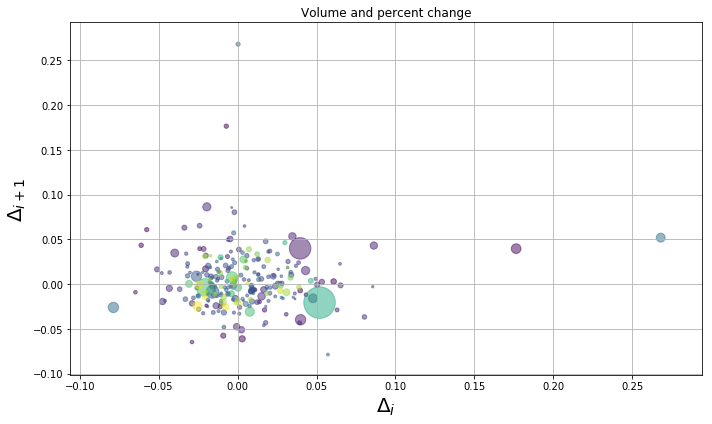

In [10]:
# Example 1
df = pd.read_csv('data/AMZN.csv', index_col='Date', parse_dates=True)
df = df[-250:]
#delta1 = np.diff(df['Adj Close'])/df['Adj Close'][:-1]
delta1 = df['Adj Close'].pct_change().dropna()
# Marker size in units of points^2
volume = (6 * df.Volume[:-2] / df.Volume[0])**2
close = 0.003 * df.Close[:-2] / 0.003 * df.Open[:-2]
fig, ax = plt.subplots(figsize=[10,6])

ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=20)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=20)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

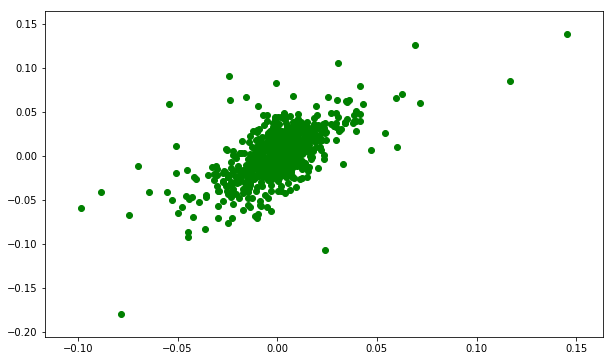

In [11]:
# Example 2: 
plt.figure(1, figsize=[10,6])
spy = pd.read_csv('data/SPY.csv', index_col='Date', parse_dates=True)
aapl = pd.read_csv('data/AAPL.csv', index_col='Date', parse_dates=True)
spy = spy['Adj Close'].pct_change()
aapl = aapl['Adj Close'].pct_change()
plt.scatter(spy, aapl, c='g');

[Linear Regression](http://scipy-cookbook.readthedocs.io/items/LinearRegression.html)

In [12]:
from scipy import stats
import pylab

In [13]:
spy = spy.dropna()
aapl = aapl.dropna()
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(spy, aapl)

In [14]:
predict_y = intercept + slope * spy
pred_error = aapl - predict_y
degrees_of_freedom = len(spy) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

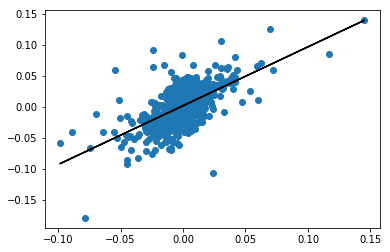

In [15]:
pylab.plot(spy, aapl, 'o')
pylab.plot(spy, predict_y, 'k-')
pylab.show()

***